In [102]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df1 = pd.read_csv("./유성구_지역화폐이용_2020.csv",encoding='CP949')
df2 = pd.read_csv("./유성구_지역화폐이용_2021.csv",encoding='CP949')
df3 = pd.read_csv("./유성구_지역화폐이용_2022_03.csv",encoding='CP949')
df4 = pd.read_csv("./유성구_지역화폐이용_2022_04.csv",encoding='CP949')
df5 = pd.read_csv("./유성구_지역화폐이용_2022_05.csv",encoding='CP949')

df = pd.concat([df1,df2,df3,df4,df4], ignore_index= True)

df["이용년"]=df["이용년"].astype(str)
df["이용월"]=df["이용월"].astype(str)

for i in range(2,3):
    df['이용월'+str(i)] = df["이용월"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..

df["이용년월"] = df["이용년"] + df["이용월2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

df['이용년월']=df['이용년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

df = df.replace(100,0) 
df.head()

,이용년,이용월,광역시도코드,광역시도명,시군구코드,시군구명,법정동코드,법정동명,표준산업대분류코드,표준산업대분류명,지수_이용건수,지수_이용금액,이용월2,이용년월
0,2020,5,30,대전광역시,30110.0,동구,3011010200,인동,I,숙박 및 음식점업(55-56),0.0,0.0,05,2020-05-01
1,2020,5,30,대전광역시,30110.0,동구,3011010400,천동,I,숙박 및 음식점업(55-56),0.0,0.0,05,2020-05-01
2,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,G,도매 및 소매업(45-47),0.0,0.0,05,2020-05-01
3,2020,5,30,대전광역시,30110.0,동구,3011010500,가오동,I,숙박 및 음식점업(55-56),0.0,0.0,05,2020-05-01
4,2020,5,30,대전광역시,30110.0,동구,3011010600,신흥동,I,숙박 및 음식점업(55-56),0.0,0.0,05,2020-05-01


In [80]:
pd.unique(df["표준산업대분류명"])

array(['숙박 및 음식점업(55-56)', '도매 및 소매업(45-47)', '제조업(10-34)',
       '협회 및 단체  수리 및 기타 개인 서비스업(94-96)', '교육 서비스업(85)',
       '보건업 및 사회복지 서비스업(86-87)', '운수 및 창고업(49-52)', '정보통신업(58-63)',
       '전문  과학 및 기술 서비스업(70-73)', '예술  스포츠 및 여가관련 서비스업(90-91)',
       '사업시설 관리  사업 지원 및 임대 서비스업(74-76)', '부동산업(68)',
       '공공 행정  국방 및 사회보장 행정(84)'], dtype=object)

In [81]:
df_tnrqk = df[(df["표준산업대분류명"] == '숙박 및 음식점업(55-56)') & (df["시군구명"] == '유성구')]

In [82]:
df_ehao = df[(df["표준산업대분류명"] == '도매 및 소매업(45-47)') & (df["시군구명"] == '유성구')]

In [83]:
df_wpwh = df[(df["표준산업대분류명"] == '제조업(10-34)')  & (df["시군구명"] == '유성구')]

In [84]:
df_guqghl = df[(df["표준산업대분류명"] == '협회 및 단체  수리 및 기타 개인 서비스업(94-96)')  & (df["시군구명"] == '유성구')]

In [85]:
df_rydbr = df[(df["표준산업대분류명"] == '교육 서비스업(85)')  & (df["시군구명"] == '유성구')]

In [86]:
df_qhrjs = df[(df["표준산업대분류명"] == '보건업 및 사회복지 서비스업(86-87)')  & (df["시군구명"] == '유성구')]

In [87]:
df_dnstn = df[(df["표준산업대분류명"] == '운수 및 창고업(49-52)')  & (df["시군구명"] == '유성구')] #운수

In [88]:
df_wjdqh = df[(df["표준산업대분류명"] == '정보통신업(58-63)')  & (df["시군구명"] == '유성구')] #정보

In [89]:
df_wjsans = df[(df["표준산업대분류명"] == '전문  과학 및 기술 서비스업(70-73)')  & (df["시군구명"] == '유성구')] # 전문

In [90]:
df_art = df[(df["표준산업대분류명"] == '예술  스포츠 및 여가관련 서비스업(90-91)')  & (df["시군구명"] == '유성구')] # 예술

In [91]:
df_dnstn = df[(df["표준산업대분류명"] == '사업시설 관리  사업 지원 및 임대 서비스업(74-76)')  & (df["시군구명"] == '유성구')] # 사업

In [92]:
df_qnehd = df[(df["표준산업대분류명"] == '부동산업(68)')  & (df["시군구명"] == '유성구')] # 부동

In [93]:
df_rhdrhd = df[(df["표준산업대분류명"] == '공공 행정  국방 및 사회보장 행정(84)')  & (df["시군구명"] == '유성구')] # 공공

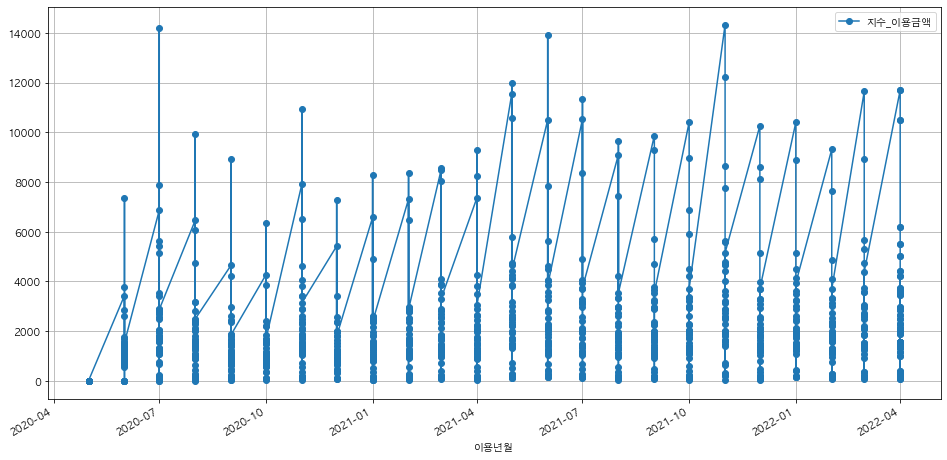

In [105]:
# plt.figure(figsize=(30,10))
# df_tnrqk.plot(x='이용년월', y='표준산업대분류명')


f, ax = plt.subplots(1,1,figsize=(16,8))
df_tnrqk.plot(x='이용년월', y='지수_이용금액', marker='o', ax=ax)
plt.grid(True)
plt.show()

